# OCR assesment of the corpus


## Le Figaro

In [1]:

import json
import os
import pandas as pd
import glob
import json
from tqdm import tqdm
import shutil
import nltk




In [2]:
import csv

csv_file_path = '/scratch/students/bousbina/dictionary.csv'
text_file_path = '/scratch/students/bousbina/dictionary_fr.txt'

with open(csv_file_path, 'r') as csv_file:
    with open(text_file_path, 'w') as text_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            text_file.write(','.join(row) + '\n')


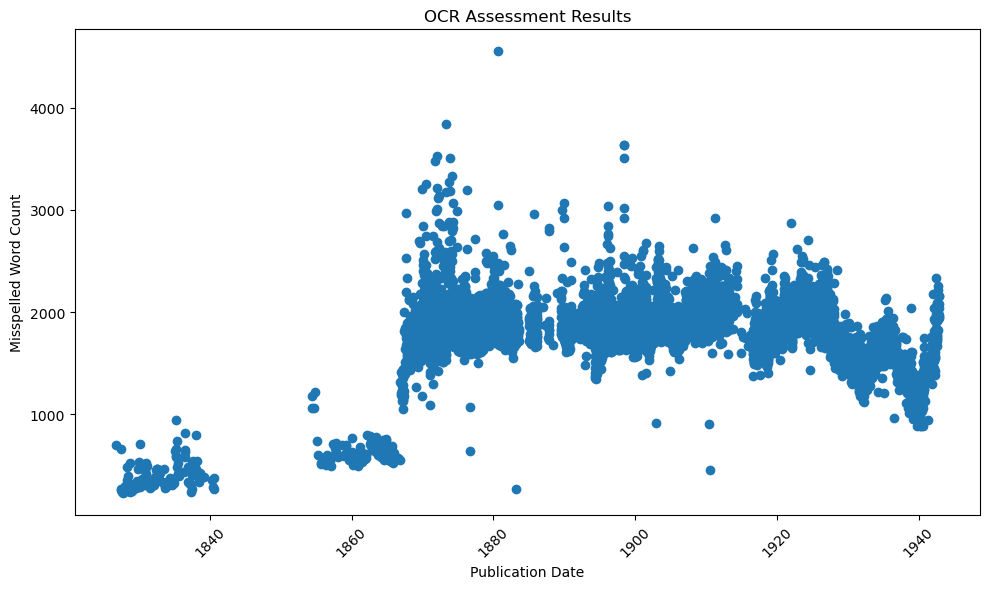

In [15]:
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to the dictionary text file
dictionary_file_path = '/scratch/students/bousbina/dictionary_fr.txt'

# pd.read_csv("/scratch/students/bousbina/corpus/France/data/future_articles_fr.csv")

# Set the path to the input CSV file
csv_file_path = '/scratch/students/bousbina/corpus/France/data/future_articles_fr.csv'

# Read the dictionary text file
with open(dictionary_file_path, 'r', encoding='utf-8') as f:
    dictionary = set([word.strip().lower() for word in f.readlines()])

# Read the CSV file using pandas
data = pd.read_csv(csv_file_path)

# Convert the publication_date column to datetime
data['publication_date'] = pd.to_datetime(data['publication_date'], format='%Y%m%d.m')
data.sort_values(by='publication_date', inplace=True)

# Perform OCR assessment on each text entry in the CSV file
misspelled_counts = []
for index, row in data.iterrows():
    text = row['content']  # Replace 'content' with the actual column name in the CSV file
    words = text.split()
    misspelled_words = [word for word in words if word.lower() not in dictionary]
    misspelled_counts.append(len(misspelled_words))

plt.figure(figsize=(10, 6))
plt.scatter(data['publication_date'], misspelled_counts)
plt.xlabel('Publication Date')
plt.ylabel('Misspelled Word Count')
plt.title('OCR Assessment Results')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

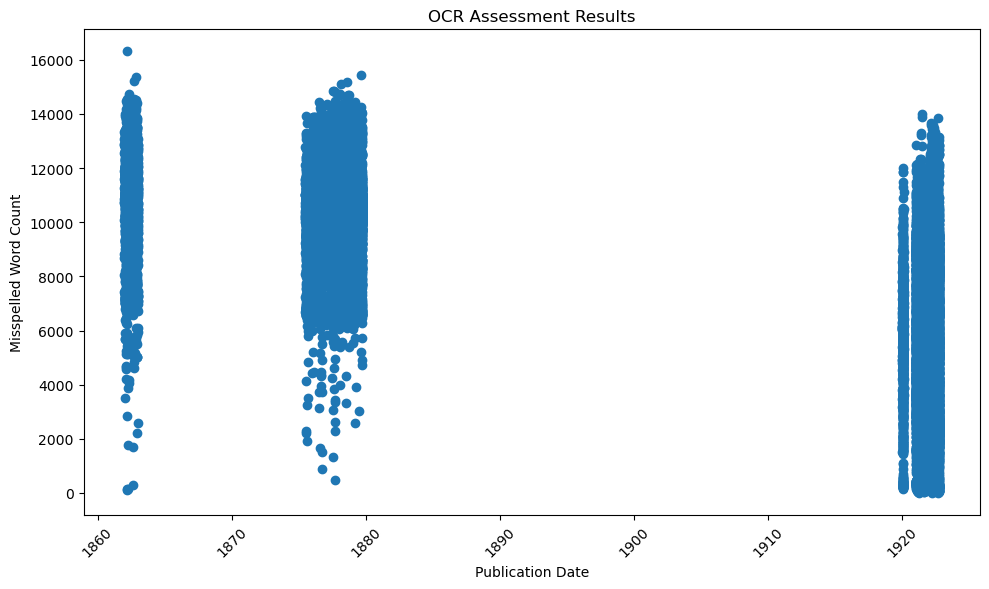

In [1]:
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to the dictionary text file
dictionary_file_path = '/scratch/students/bousbina/dictionary_en.txt'

# pd.read_csv("/scratch/students/bousbina/corpus/France/data/future_articles_fr.csv")

# Set the path to the input CSV file
csv_file_path = '/scratch/students/bousbina/code/df_nyh.csv'

# Read the dictionary text file
with open(dictionary_file_path, 'r', encoding='utf-8') as f:
    dictionary = set([word.strip().lower() for word in f.readlines()])

# Read the CSV file using pandas
data = pd.read_csv(csv_file_path)
data = data.head(30000)

# Convert the publication_date column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data.sort_values(by='date', inplace=True)

# Perform OCR assessment on each text entry in the CSV file
misspelled_counts = []
for index, row in data.iterrows():
    text = row['text']
    # Replace 'content' with the actual column name in the CSV file
    words = text.split()
    misspelled_words = [word for word in words if word.lower() not in dictionary]
    misspelled_counts.append(len(misspelled_words))

plt.figure(figsize=(10, 6))
plt.scatter(data['date'], misspelled_counts)
plt.xlabel('Publication Date')
plt.ylabel('Misspelled Word Count')
plt.title('OCR Assessment Results')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()